In [89]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import InstanceHardnessThreshold


from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek

from imblearn.ensemble import EasyEnsemble
from imblearn.ensemble import BalanceCascade

In [90]:
def print_y(y, y_resampled):
    print("class 0 : ",list(y).count(0) , '\t \t \t \t', "class 1 : ",list(y).count(1))
    print("class 0 resampled: ",list(y_resampled).count(0), '\t \t', "class 1 resampled: ",list(y_resampled).count(1))
    
def plot_o_r(X, y, X_resampled, y_resampled, resample_name = ''):
    f, (ax1, ax2) = plt.subplots(1, 2)
    plot_resampling(ax1, X, y, "original")
    plot_resampling(ax2, X_resampled, y_resampled, "resampled " + resample_name)
    plt.show()
    print('---------------------------------------------------------------')

class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  4671 	 	 class 1 resampled:  4671


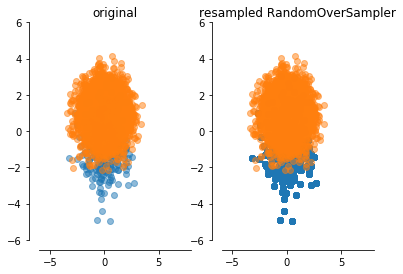

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  4671 	 	 class 1 resampled:  4671


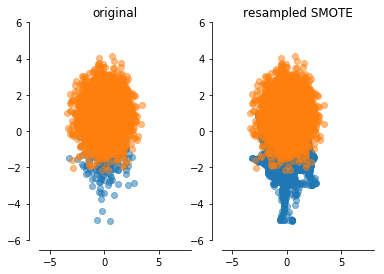

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  4683 	 	 class 1 resampled:  4671


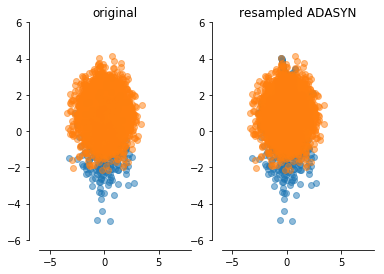

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  329


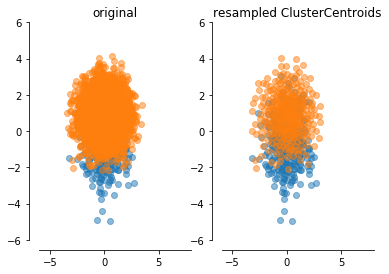

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  329


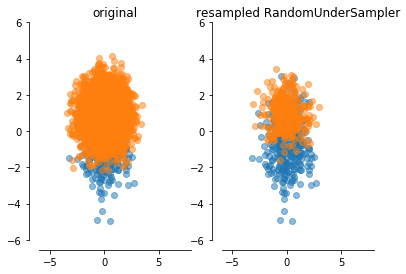

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  329


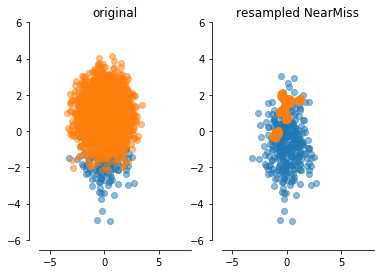

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  4569


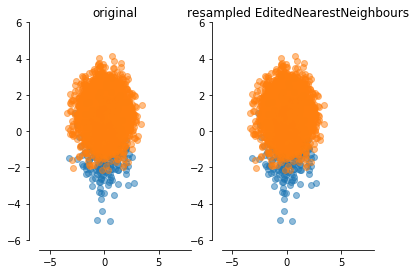

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  4537


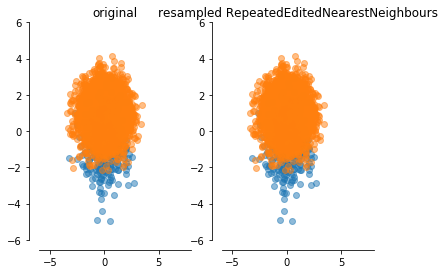

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  4555


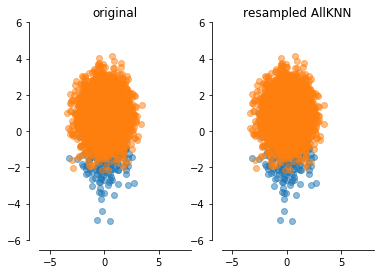

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  247


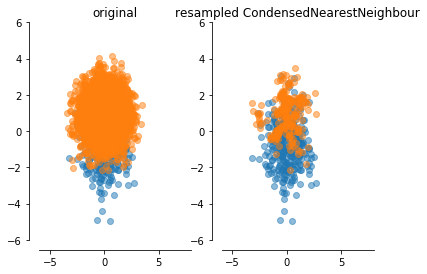

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  4595


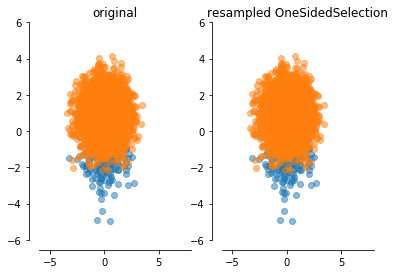

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  4660


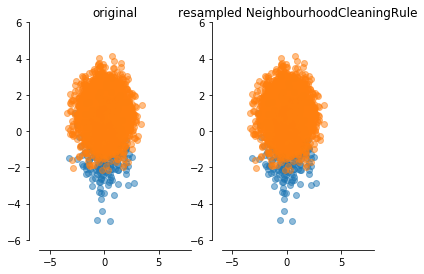

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  329 	 	 class 1 resampled:  329


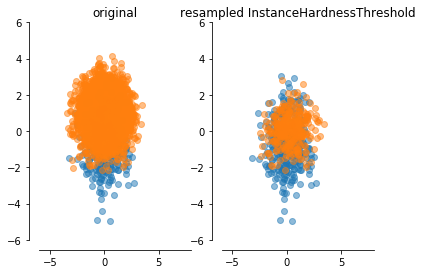

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  4581 	 	 class 1 resampled:  4581


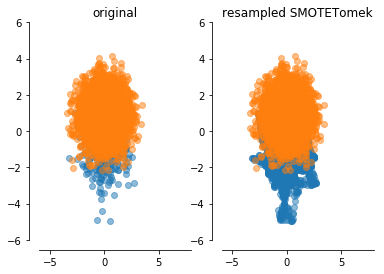

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671
class 0 resampled:  4337 	 	 class 1 resampled:  4105


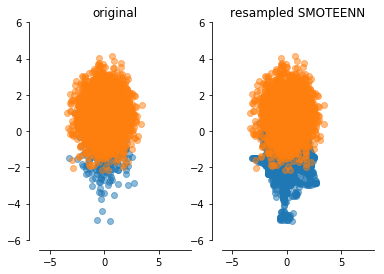

---------------------------------------------------------------
class 0 :  329 	 	 	 	 class 1 :  4671


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [98]:

X, y = make_classification(n_samples=5000, n_features=3, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.06, 0.94],
                           class_sep=0.9, random_state=19)

 

samplers = [RandomOverSampler(random_state=0), SMOTE(), ADASYN()
           ,ClusterCentroids(random_state=0),RandomUnderSampler(random_state=0)
   , NearMiss(random_state=0, version=1)
   , EditedNearestNeighbours(random_state=0)
   , RepeatedEditedNearestNeighbours(random_state=0)
   , AllKNN(random_state=0)
   , CondensedNearestNeighbour(random_state=0)
   ,  OneSidedSelection(random_state=0)
   , NeighbourhoodCleaningRule(random_state=0)
,InstanceHardnessThreshold(random_state=0, estimator=LogisticRegression())
,SMOTETomek(random_state=0)
            ,SMOTEENN()
 ,EasyEnsemble(random_state=0, n_subsets=10)
           ,BalanceCascade(random_state=0,  estimator=LogisticRegression(random_state=0), n_max_subset=4)
           ]



for sampler in samplers:
    X_resampled, y_resampled = sampler.fit_sample(X, y)
    print_y(y,y_resampled)
    plot_o_r(X, y, X_resampled, y_resampled, (str(sampler).split('('))[0])

In [99]:
print(X)
print(type(X))
print(type(X_resampled))

[[ 2.71760707  0.94030267  0.92144881]
 [-1.19644393  0.88850607  0.91632036]
 [ 0.46553696  0.47638824  1.32041511]
 ..., 
 [ 0.1213964   1.0482271   0.71209371]
 [-0.59248963  1.77958772  0.15011202]
 [ 0.31789494  1.03951847  0.64249946]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


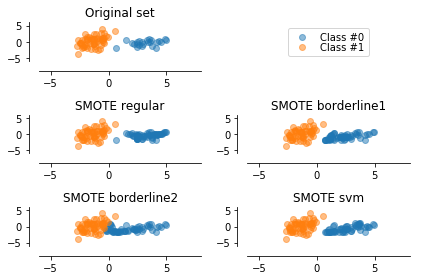

In [77]:
### SMOTE ###


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

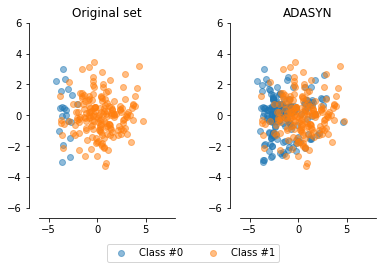

In [4]:
### ADASYN ###

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=200, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('ADASYN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [124]:
import pandas as pd
import numpy as np

In [178]:

#create dataframe
index = ['A','B','C', 'D', 'E', 'F', 'G', 'H', 'I']
columns = ['C1','C2']
df=pd.DataFrame(index=index, columns=columns)
df.fillna(0, inplace=True) # replace 0s where ever it finds NaNs


#change values
df.set_value('C', 'C1', 10)
df.set_value('A', 'C2', 1)
df.set_value('A', 'C2', 15)
df.set_value('B', 'C1', 44)
df.set_value('D', 'C1', 4)
df.set_value('E', 'C1', 4)
df.set_value('F', 'C1', 4)
df.set_value('G', 'C2', 4)
df.set_value('H', 'C2', 4)
df.set_value('I', 'C2', 4)

print(df, end= "\n \n")
print(df.columns)
print(df.index)

   C1  C2
A   0  15
B  44   0
C  10   0
D   4   0
E   4   0
F   4   0
G   0   4
H   0   4
I   0   4
 
Index(['C1', 'C2'], dtype='object')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object')


In [179]:
ndf = df.values
print(ndf)
print(type(ndf))

[[ 0 15]
 [44  0]
 [10  0]
 [ 4  0]
 [ 4  0]
 [ 4  0]
 [ 0  4]
 [ 0  4]
 [ 0  4]]
<class 'numpy.ndarray'>


In [180]:
df2 = pd.DataFrame(data=df.values,    # values
              index=index,    # 1st column as index
              columns=columns) 

print(df2, end= "\n \n")

   C1  C2
A   0  15
B  44   0
C  10   0
D   4   0
E   4   0
F   4   0
G   0   4
H   0   4
I   0   4
 


In [181]:
series = pd.Series([0,1,0,1,0,0,0,0,0], index=index)
print(type(series))
print(series)

<class 'pandas.core.series.Series'>
A    0
B    1
C    0
D    1
E    0
F    0
G    0
H    0
I    0
dtype: int64


In [182]:
def resample_dataframe(X,y):
    
    columns = X.columns
    indices = X.index
    
    sampler = SMOTE()
    X_resampled, y_resampled = sampler.fit_sample(X.values, np.array(y)) 
    
    return X_resampled, y_resampled

In [183]:
print(df, '\n',series)
cc = resample_dataframe(df,series)
print(cc)

   C1  C2
A   0  15
B  44   0
C  10   0
D   4   0
E   4   0
F   4   0
G   0   4
H   0   4
I   0   4 
 A    0
B    1
C    0
D    1
E    0
F    0
G    0
H    0
I    0
dtype: int64


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6

In [185]:
indices2 = pd.date_range('2017-08-05 23:00:00', '2017-08-05 23:10:00', dtype='datetime64[ns]', freq='5T')
indices3 = pd.date_range('2017-08-05 23:10:00', '2017-08-05 23:20:00', dtype='datetime64[ns]', freq='5T')
idz = indices2.union(indices3)
print(idz)

DatetimeIndex(['2017-08-05 23:00:00', '2017-08-05 23:05:00',
               '2017-08-05 23:10:00', '2017-08-05 23:15:00',
               '2017-08-05 23:20:00'],
              dtype='datetime64[ns]', freq='5T')


In [188]:
dates = pd.date_range('2017-08-05 23:00:00', periods=3, freq='5T') 
print(dates)

DatetimeIndex(['2017-08-05 23:00:00', '2017-08-05 23:05:00',
               '2017-08-05 23:10:00'],
              dtype='datetime64[ns]', freq='5T')
